<a href="https://colab.research.google.com/github/MitPitt/coursework/blob/main/Social_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Модель Басса

просто для красоты

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def dfsn_abm(p, q, M, T):
    adopt = list()
    x = np.zeros((M,), np.float32)
    x_temp = np.zeros((M,), np.float32)
    adoptions = pd.DataFrame(np.arange(1,T), columns = ['time'])
    for t in range(T):
        for i in range(1,M):
            prob = (p + q * (np.sum(x) / M)) * (1 - x[i])
            if np.random.uniform(0,1,1) <= prob:
                x_temp[i] = 1
        x = x_temp
        adopt.append(np.sum(x))
    return adopt

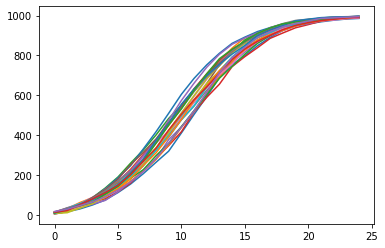

In [ ]:
sim_dfsn = [dfsn_abm(0.01, 0.3, 1000, 25) for _ in range(25)]
df = pd.DataFrame(np.array(sim_dfsn))
df = df.transpose()

df.plot(legend = None)

## Предложенная модель

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

Пример построения графа библиотекой NetworkX

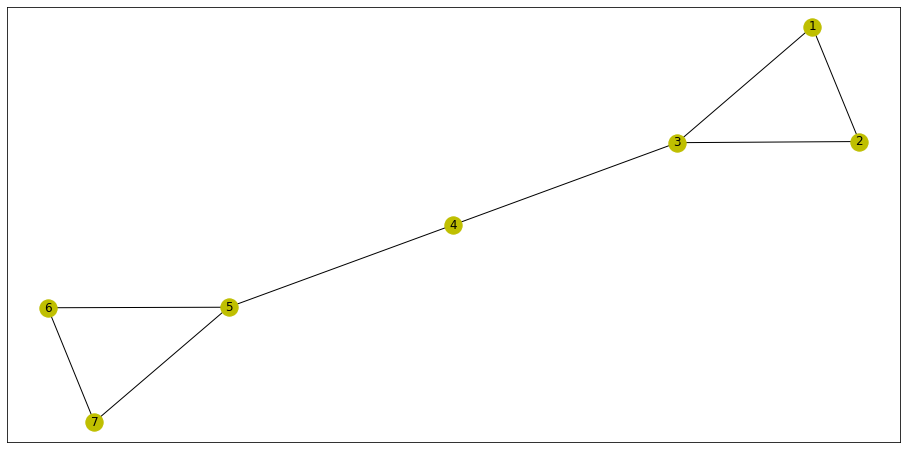

In [2]:
social_network = nx.Graph()
social_network.add_edges_from([(1,2), (1,3), (3,4), (4,5), (5,6), (5,7), (6,7), (2,3)])

pos = nx.spring_layout(social_network)

plt.figure(figsize=(16,8))
nx.draw_networkx(social_network, pos, node_color='y')
plt.show()

Построение графа из набора данных "Social circles: Facebook"

https://snap.stanford.edu/data/egonets-Facebook.html

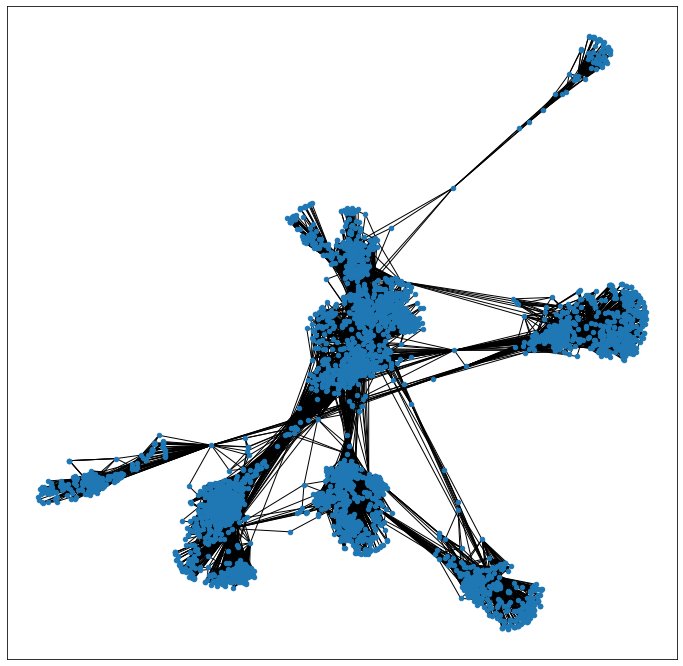

In [3]:
social_network = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

pos = nx.spring_layout(social_network)

plt.figure(figsize=(12,12))
nx.draw_networkx(social_network, pos, with_labels=False, node_size=20)
plt.show()

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def step(social_network, seeds, x, leng):
    new_seeds = set()

    if leng == 0:
        for node in social_network.nodes:
            if node in seeds:
                continue
            else:
                #for neighbor in social_network.predecessors(node): # для направленного графа
                for neighbor in social_network.neighbors(node):
                    if neighbor in seeds:
                        p = sigmoid(social_network.nodes[node]['b'])
                        if random.random() > 1-p:
                            new_seeds.add(node) 
                            break
    else:
        for node in social_network.nodes:
            if node in seeds:
                continue
            else:
                #for neighbor in social_network.predecessors(node): # для направленного графа
                for neighbor in social_network.neighbors(node):
                    if neighbor in seeds:
                        p = sigmoid(social_network.nodes[node]['b'] + x.dot(social_network.edges[neighbor,node]['w']))
                        if random.random() > 1-p:
                            new_seeds.add(node) 
                            break

    seeds |= new_seeds

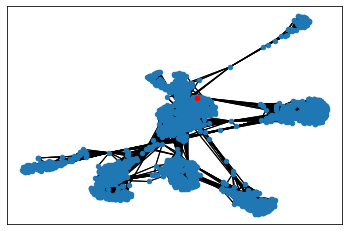

In [5]:
seeds = set(random.sample(social_network.nodes, 1))

nx.draw_networkx(social_network, pos, with_labels=False, node_size=20)
nx.draw_networkx(social_network, pos, nodelist = seeds, node_color = 'r', with_labels=False, node_size=20)

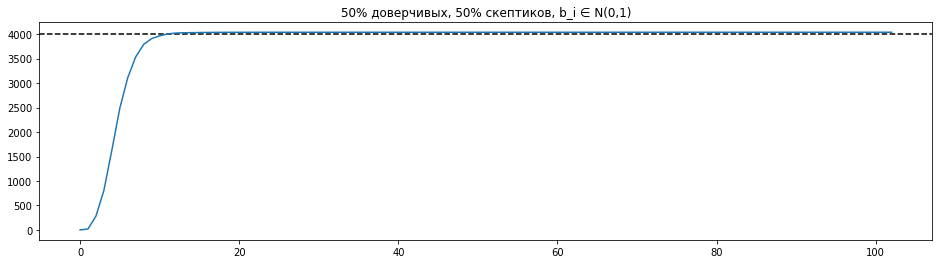

In [8]:
alls = []
maxx = 0

x = np.array([]) # параметры сообщения
leng = len(x)

ratio = 0.50

for _ in range(100):
        
    for edge in social_network.edges:
        if random.random() >= ratio:
            social_network.edges[edge[0],edge[1]]['w'] = np.array([])
        else:
            social_network.edges[edge[0],edge[1]]['w'] = np.array([])

    for node in social_network.nodes:
        social_network.nodes[node]['b'] = np.random.normal()
        # social_network.nodes[node]['external'] = 0 # параметр 0<q<1 может быть задан для реализации агентной версии модели Басса

    seeds = set(random.sample(social_network.nodes, 1))

    cont = [len(seeds)]
    while len(seeds) < len(social_network.nodes):
        step(social_network, seeds, x, leng)
        cont.append(len(seeds))
    if len(cont) > maxx:
        maxx = len(cont)
    alls.append(cont)

for i in range(len(alls)):
    if len(alls[i]) < maxx:
        alls[i].extend([len(social_network.nodes)]*(maxx-len(alls[i])))
alls = np.mean(alls, axis=0)

plt.figure(figsize=(16,4))
plt.axhline(y=int(4039*0.99), color='black', linestyle='--')
plt.title('50% доверчивых, 50% скептиков, b_i ∈ N(0,1)') #∈ N(0,1)
plt.plot(alls)
plt.show()

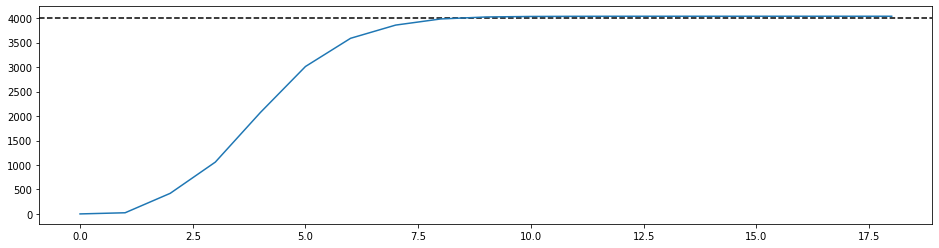

In [ ]:
alls = []
maxx = 0

x = np.array([0.5,0.5]) # параметры сообщения
leng = len(x)

ratio = 0.50

for _ in range(100):
        
    for edge in social_network.edges:
        if 0.66 <= random.random():
            social_network.edges[edge[0],edge[1]]['w'] = np.array([-2,0])
        if 0.33 <= random.random() < 0.66:
            social_network.edges[edge[0],edge[1]]['w'] = np.array([2,2])
        else:
            social_network.edges[edge[0],edge[1]]['w'] = np.array([2,-2])

    for node in social_network.nodes:
        social_network.nodes[node]['b'] = 0#np.random.normal()
        # social_network.nodes[node]['external'] = 0 # параметр 0<q<1 может быть задан для реализации агентной версии модели Басса

    seeds = set(random.sample(social_network.nodes, 1))

    cont = [len(seeds)]
    while len(seeds) < len(social_network.nodes):
        step(social_network, seeds, x, leng)
        cont.append(len(seeds))
    if len(cont) > maxx:
        maxx = len(cont)
    alls.append(cont)

for i in range(len(alls)):
    if len(alls[i]) < maxx:
        alls[i].extend([len(social_network.nodes)]*(maxx-len(alls[i])))
alls = np.mean(alls, axis=0)

plt.figure(figsize=(16,4))
plt.axhline(y=int(4039*0.99), color='black', linestyle='--')
plt.plot(alls)
plt.show()

In [6]:
iters = 17

matrix = np.zeros((iters,iters))

ai = 0
aj = 0
aq = 0

for i, x1 in enumerate(np.linspace(-1,1,iters)):
    for j, x2 in enumerate(np.linspace(-1,1,iters)):
        alls = []

        x = np.array([x1,x2]) # параметры сообщения
        leng = len(x)

        ratio = 0.50

        for _ in range(25):
                
            for edge in social_network.edges:
                r = random.sample((0,1,2), 1)[0]
                if r == 0:
                    ai+=1
                    social_network.edges[edge[0],edge[1]]['w'] = np.array([-2,0])
                elif r == 1:
                    social_network.edges[edge[0],edge[1]]['w'] = np.array([2,2])
                    aj+=1
                elif r == 2:
                    social_network.edges[edge[0],edge[1]]['w'] = np.array([2,-2])
                    aq+=1

            for node in social_network.nodes:
                social_network.nodes[node]['b'] = 0#np.random.normal()
                # social_network.nodes[node]['external'] = 0 # параметр 0<q<1 может быть задан для реализации агентной версии модели Басса

            seeds = set(random.sample(social_network.nodes, 1))

            cont = [len(seeds)]
            while len(seeds) < int(4039*0.99):
                step(social_network, seeds, x, leng)
                cont.append(len(seeds))
            alls.append(len(cont))

        matrix[i,j] = np.mean(alls)
        #print(i,j)
        print(x1,x2, np.mean(alls))
print(ai,aj,aq)

-1.0 -1.0 13.76
-1.0 -0.875 13.24
-1.0 -0.75 12.48
-1.0 -0.625 12.68
-1.0 -0.5 12.68
-1.0 -0.375 13.16
-1.0 -0.25 13.76
-1.0 -0.125 13.48
-1.0 0.0 13.2
-1.0 0.125 13.52
-1.0 0.25 14.96
-1.0 0.375 13.64
-1.0 0.5 13.12
-1.0 0.625 14.44
-1.0 0.75 13.12
-1.0 0.875 11.64
-1.0 1.0 11.84
-0.875 -1.0 12.44
-0.875 -0.875 11.12
-0.875 -0.75 12.32
-0.875 -0.625 11.76
-0.875 -0.5 13.48
-0.875 -0.375 12.12
-0.875 -0.25 13.08
-0.875 -0.125 13.44
-0.875 0.0 11.6
-0.875 0.125 12.72
-0.875 0.25 12.04
-0.875 0.375 12.68
-0.875 0.5 12.28
-0.875 0.625 11.96
-0.875 0.75 11.68
-0.875 0.875 11.8
-0.875 1.0 11.72
-0.75 -1.0 10.72
-0.75 -0.875 10.96
-0.75 -0.75 11.92
-0.75 -0.625 11.2
-0.75 -0.5 12.0
-0.75 -0.375 11.44
-0.75 -0.25 12.08
-0.75 -0.125 12.2
-0.75 0.0 11.12
-0.75 0.125 12.16
-0.75 0.25 11.52
-0.75 0.375 11.44
-0.75 0.5 11.76
-0.75 0.625 11.12
-0.75 0.75 12.4
-0.75 0.875 11.28
-0.75 1.0 12.8
-0.625 -1.0 10.6
-0.625 -0.875 11.12
-0.625 -0.75 11.0
-0.625 -0.625 11.12
-0.625 -0.5 11.08
-0.625 -0.375 1

In [ ]:
print(matrix)

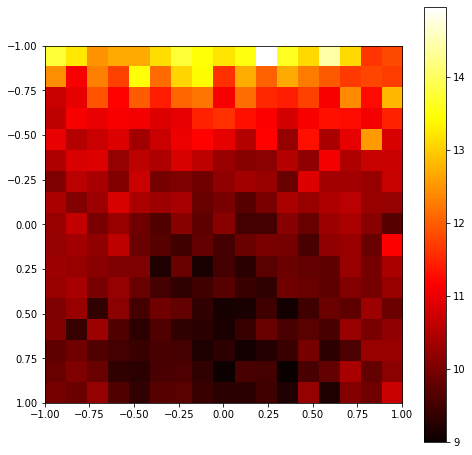

In [8]:
def heatmap2d(arr):
    plt.figure(figsize=(8,8))
    plt.imshow(arr, cmap='hot', extent=[-1,1,1,-1])
    plt.colorbar()
    plt.show()

heatmap2d(matrix)